In [1]:
import os
from dataclasses import dataclass
os.chdir('/workspace')
import torch
import matplotlib.pyplot as plt
from dataset import build_dataset
from models import UNet
from model import AttUNet

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [20]:
@dataclass
class config:
    img_size = 32

In [21]:
trainset,valset,testset = build_dataset(img_size=config.img_size)

File paths loaded from ./csv/total_numpy.csv


In [22]:
model = AttUNet()
chkpt = torch.load('/workspace/checkpoints/attn/c/chkpt_479_94.89.pth')['model_state_dict']
model.load_state_dict(chkpt)

<All keys matched successfully>

In [23]:
def get_test_sample(testset,idx):
    inp, target = testset[idx]
    return inp,target

inp,target = get_test_sample(trainset,0)
inp.shape,target.shape

(torch.Size([3, 32, 32]), torch.Size([1, 32, 32]))

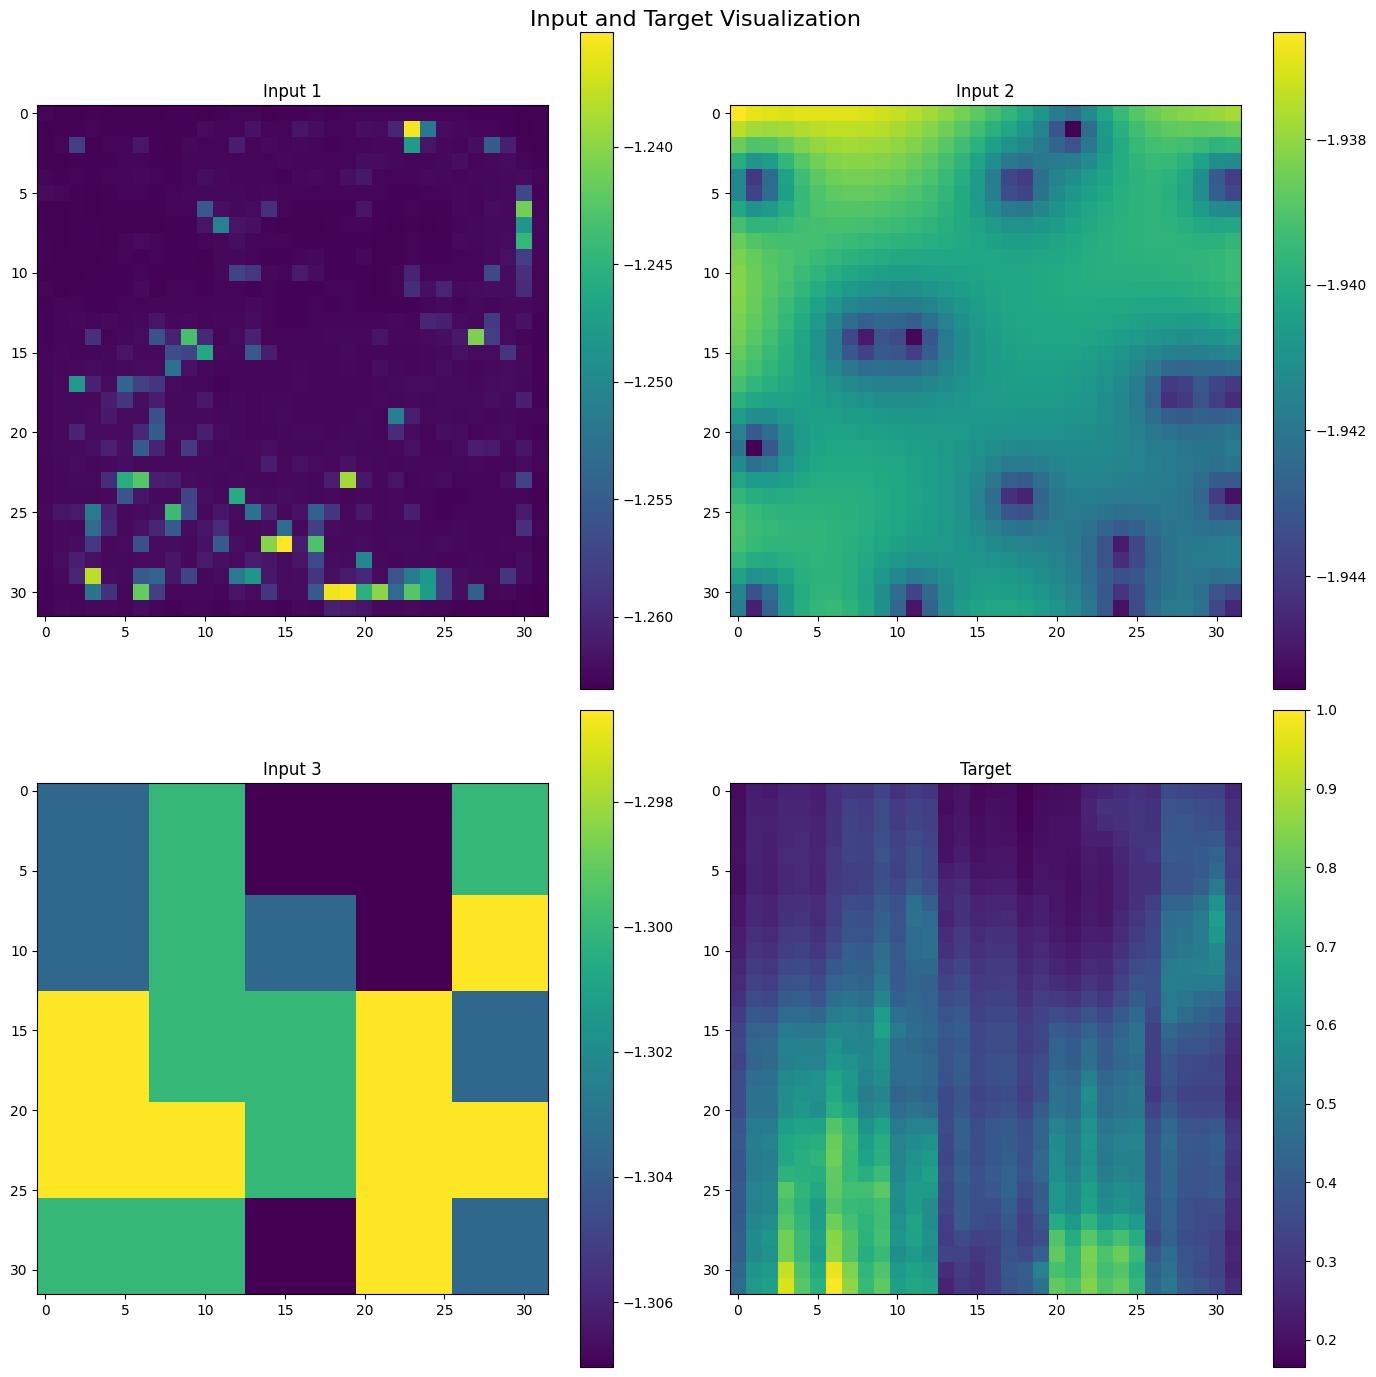

In [24]:
def visualize_data(inp, target, titles=None):
    """
    Visualize input and target tensors in a 2x2 subplot with colorbars.
    
    Args:
    inp (torch.Tensor): Input tensor of shape (3, 256, 256)
    target (torch.Tensor): Target tensor of shape (1, 256, 256)
    titles (list): List of titles for each subplot. If None, default titles will be used.
    """
    if titles is None:
        titles = ['Input 1', 'Input 2', 'Input 3', 'Target']
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 14))
    fig.suptitle('Input and Target Visualization', fontsize=16)
    
    # Flatten axs for easy iteration
    axs = axs.flatten()
    
    # Visualize each input channel and the target
    for i in range(3):
        im = axs[i].imshow(inp[i].cpu().numpy(), cmap='viridis')
        axs[i].set_title(titles[i])
        fig.colorbar(im, ax=axs[i])
    
    # Visualize the target
    im = axs[3].imshow(target[0].cpu().numpy(), cmap='viridis')
    axs[3].set_title(titles[3])
    fig.colorbar(im, ax=axs[3])
    
    plt.tight_layout()
    plt.show()

visualize_data(inp,target)    

In [25]:
def get_pred(model,inp):
    model.eval()
    model.to('cuda:7')
    with torch.no_grad():
        pred = model(inp.unsqueeze(0).to('cuda:7'))
    return pred.squeeze(0).squeeze(0)

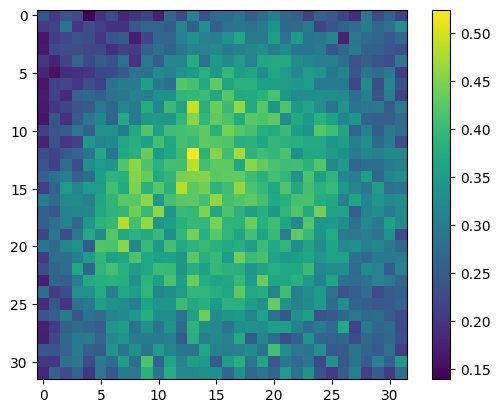

In [26]:
pred = get_pred(model,inp)
pred.shape
plt.imshow(pred.cpu().numpy())
plt.colorbar()